### Dependencies

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import pickle
from sklearn.cluster import KMeans
from sklearn.preprocessing import Imputer
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')
import time

/Users/chasekregor/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Creating SQLite Database

In [2]:
conn = sqlite3.connect(r"ml-20m.db")

uncommment cells below inorder to make the actual database, uncomment before final commit for reproducibility. You comment them out so that way each time you run the notebook you arent making the database again. 

In [3]:
#genomescores = pd.read_csv("ml-20m/genome-scores.csv")
#genomescores.head()

In [4]:
#genomescores.to_sql("genomescores", conn, if_exists="replace")

In [5]:
#genometags = pd.read_csv("ml-20m/genome-tags.csv")
#genometags.head()

In [6]:
#genometags.to_sql("genometags", conn, if_exists="replace")

In [7]:
#links = pd.read_csv("ml-20m/links.csv")
#links.head()

In [8]:
#links.to_sql("links", conn, if_exists="replace")

In [9]:
#movies = pd.read_csv("ml-20m/movies.csv")
#movies.head()

In [10]:
#movies.to_sql("movies", conn, if_exists="replace")

In [11]:
#ratings = pd.read_csv("ml-20m/ratings.csv")
#ratings.head()

In [12]:
#ratings.to_sql("ratings", conn, if_exists="replace")

In [13]:
#tags = pd.read_csv("ml-20m/tags.csv")
#tags.head()

In [14]:
#tags.to_sql("tags", conn, if_exists="replace")

### Querying, Loading, and Cleaning Data (LIMIT 1 million in 54 seconds)

In [15]:
start = time.time()

model = pd.read_sql_query("""SELECT userId, 
movieid,
rating,
title as titles


FROM ratings INNER JOIN movies USING (movieId)



ORDER BY userId ASC


LIMIT 10000000;""", conn)

end = time.time()
print(end - start)

64.44550609588623


In [16]:
model.head(10)

,userId,movieId,rating,titles
0,1,2,3.5,Jumanji (1995)
1,1,29,3.5,"City of Lost Children, The (Cité des enfants p..."
2,1,32,3.5,Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
3,1,47,3.5,Seven (a.k.a. Se7en) (1995)
4,1,50,3.5,"Usual Suspects, The (1995)"
5,1,112,3.5,Rumble in the Bronx (Hont faan kui) (1995)
6,1,151,4.0,Rob Roy (1995)
7,1,223,4.0,Clerks (1994)
8,1,253,4.0,Interview with the Vampire: The Vampire Chroni...
9,1,260,4.0,Star Wars: Episode IV - A New Hope (1977)


In [17]:
model.titles.value_counts().sum()

10000000

In [18]:
#modelb = pd.read_csv('data/100k.csv')
#modelb.head(10)

In [19]:
#modelb = modelb.astype(float)

In [20]:
model = model.pivot_table(index = ['userId'], columns='titles', values = 'rating')

In [21]:
model = model.reset_index()
model.head(10)

titles,userId,"""Great Performances"" Cats (1998)",#chicagoGirl: The Social Network Takes on a Dictator (2013),$ (Dollars) (1971),$5 a Day (2008),$9.99 (2008),$ellebrity (Sellebrity) (2012),'71 (2014),'Hellboy': The Seeds of Creation (2004),"'Human' Factor, The (Human Factor, The) (1975)",...,loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Qué hacer! (1970),¡Three Amigos! (1986),À l'aventure (2008),À nos amours (1983),À nous la liberté (Freedom for Us) (1931),À propos de Nice (1930),Árido Movie (2005)
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
7,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


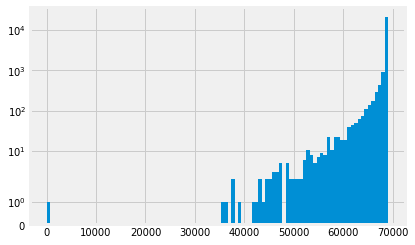

In [22]:
ax = model.isnull().sum().hist(bins = 100)
ax.set_yscale('symlog')

In [23]:
#https://stackoverflow.com/questions/46939314/drop-columns-in-a-pandas-dataframe-based-on-the-of-null-values

thresh = len(model) * .05
model.dropna(thresh = thresh, axis = 1, inplace = True)

In [24]:
model.head(25)

titles,userId,10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),"13th Warrior, The (1999)",2001: A Space Odyssey (1968),28 Days Later (2002),300 (2007),"40-Year-Old Virgin, The (2005)",...,Willy Wonka & the Chocolate Factory (1971),Witness (1985),"Wizard of Oz, The (1939)","World Is Not Enough, The (1999)","X-Files: Fight the Future, The (1998)",X-Men (2000),X2: X-Men United (2003),You've Got Mail (1998),Young Frankenstein (1974),Zoolander (2001)
0,1,NaN,NaN,NaN,NaN,NaN,3.5,3.5,NaN,NaN,...,NaN,NaN,3.5,NaN,NaN,NaN,4.0,NaN,4.0,NaN
1,2,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,5.0,4.0,4.0,NaN,5.0,NaN,NaN,NaN,5.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,4.0,NaN,3.0,NaN,NaN
7,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


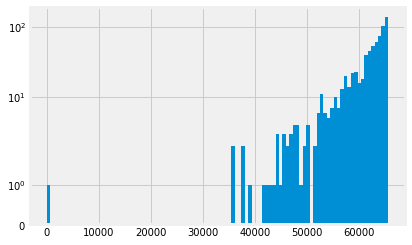

In [25]:
ax = model.isnull().sum().hist(bins = 100)
ax.set_yscale('symlog')

In [26]:
#""""

for column in model:
    model[column].fillna((model[column].mean()), inplace=True)
    #MIGHT BE THE REASON THE MODEL IS SO GENERIC!!!
    #model[column].fillna(0, inplace = True)


    
model.head(10)

#"""

titles,userId,10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),"13th Warrior, The (1999)",2001: A Space Odyssey (1968),28 Days Later (2002),300 (2007),"40-Year-Old Virgin, The (2005)",...,Willy Wonka & the Chocolate Factory (1971),Witness (1985),"Wizard of Oz, The (1939)","World Is Not Enough, The (1999)","X-Files: Fight the Future, The (1998)",X-Men (2000),X2: X-Men United (2003),You've Got Mail (1998),Young Frankenstein (1974),Zoolander (2001)
0,1,3.476847,3.06504,3.439101,4.222248,3.107873,3.500000,3.500000,3.684269,3.558183,...,3.713561,3.851339,3.500000,3.196281,3.320659,3.601458,4.000000,3.154423,4.000000,3.252874
1,2,3.476847,3.06504,3.439101,4.222248,3.107873,5.000000,3.747578,3.684269,3.558183,...,3.713561,3.851339,3.984574,3.196281,3.320659,3.601458,3.677254,3.154423,3.999468,3.252874
2,3,3.476847,3.06504,3.439101,4.222248,3.107873,5.000000,3.747578,3.684269,3.558183,...,5.000000,4.000000,4.000000,3.196281,5.000000,3.601458,3.677254,3.154423,5.000000,3.252874
3,4,3.476847,3.06504,3.439101,4.222248,3.107873,3.953821,3.747578,3.684269,3.558183,...,3.713561,3.851339,3.984574,3.196281,3.320659,3.601458,3.677254,3.154423,3.999468,3.252874
4,5,3.476847,3.06504,3.439101,4.222248,3.107873,3.953821,3.747578,3.684269,3.558183,...,2.000000,3.851339,3.984574,3.196281,3.320659,3.601458,3.677254,3.154423,3.999468,3.252874
5,6,3.476847,3.06504,3.439101,4.222248,3.107873,3.953821,3.747578,3.684269,3.558183,...,1.000000,3.851339,3.984574,3.196281,3.320659,3.601458,3.677254,3.154423,3.999468,3.252874
6,7,3.476847,3.06504,3.439101,4.222248,3.107873,3.000000,3.747578,3.684269,3.558183,...,3.713561,4.000000,3.984574,3.196281,3.320659,4.000000,3.677254,3.000000,3.999468,3.252874
7,8,3.476847,3.06504,3.439101,4.222248,3.107873,3.953821,3.747578,3.684269,3.558183,...,3.713561,3.851339,3.984574,3.196281,3.320659,3.601458,3.677254,3.154423,3.999468,3.252874
8,9,3.476847,3.06504,3.439101,4.222248,3.107873,3.953821,3.747578,3.684269,3.558183,...,3.713561,3.851339,3.984574,3.196281,3.320659,3.601458,3.677254,3.154423,3.999468,3.252874
9,10,3.476847,3.06504,3.439101,4.222248,3.107873,3.953821,3.747578,3.684269,3.558183,...,3.713561,3.851339,3.984574,3.196281,3.320659,3.601458,3.677254,3.154423,3.999468,3.252874


In [27]:
model = model.drop(columns=['userId'])

In [28]:
model.head(15)

titles,10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),"13th Warrior, The (1999)",2001: A Space Odyssey (1968),28 Days Later (2002),300 (2007),"40-Year-Old Virgin, The (2005)",A.I. Artificial Intelligence (2001),...,Willy Wonka & the Chocolate Factory (1971),Witness (1985),"Wizard of Oz, The (1939)","World Is Not Enough, The (1999)","X-Files: Fight the Future, The (1998)",X-Men (2000),X2: X-Men United (2003),You've Got Mail (1998),Young Frankenstein (1974),Zoolander (2001)
0,3.476847,3.06504,3.439101,4.222248,3.107873,3.500000,3.500000,3.684269,3.558183,3.207605,...,3.713561,3.851339,3.500000,3.196281,3.320659,3.601458,4.000000,3.154423,4.000000,3.252874
1,3.476847,3.06504,3.439101,4.222248,3.107873,5.000000,3.747578,3.684269,3.558183,3.207605,...,3.713561,3.851339,3.984574,3.196281,3.320659,3.601458,3.677254,3.154423,3.999468,3.252874
2,3.476847,3.06504,3.439101,4.222248,3.107873,5.000000,3.747578,3.684269,3.558183,3.207605,...,5.000000,4.000000,4.000000,3.196281,5.000000,3.601458,3.677254,3.154423,5.000000,3.252874
3,3.476847,3.06504,3.439101,4.222248,3.107873,3.953821,3.747578,3.684269,3.558183,3.207605,...,3.713561,3.851339,3.984574,3.196281,3.320659,3.601458,3.677254,3.154423,3.999468,3.252874
4,3.476847,3.06504,3.439101,4.222248,3.107873,3.953821,3.747578,3.684269,3.558183,3.207605,...,2.000000,3.851339,3.984574,3.196281,3.320659,3.601458,3.677254,3.154423,3.999468,3.252874
5,3.476847,3.06504,3.439101,4.222248,3.107873,3.953821,3.747578,3.684269,3.558183,3.207605,...,1.000000,3.851339,3.984574,3.196281,3.320659,3.601458,3.677254,3.154423,3.999468,3.252874
6,3.476847,3.06504,3.439101,4.222248,3.107873,3.000000,3.747578,3.684269,3.558183,2.000000,...,3.713561,4.000000,3.984574,3.196281,3.320659,4.000000,3.677254,3.000000,3.999468,3.252874
7,3.476847,3.06504,3.439101,4.222248,3.107873,3.953821,3.747578,3.684269,3.558183,3.207605,...,3.713561,3.851339,3.984574,3.196281,3.320659,3.601458,3.677254,3.154423,3.999468,3.252874
8,3.476847,3.06504,3.439101,4.222248,3.107873,3.953821,3.747578,3.684269,3.558183,3.207605,...,3.713561,3.851339,3.984574,3.196281,3.320659,3.601458,3.677254,3.154423,3.999468,3.252874
9,3.476847,3.06504,3.439101,4.222248,3.107873,3.953821,3.747578,3.684269,3.558183,3.207605,...,3.713561,3.851339,3.984574,3.196281,3.320659,3.601458,3.677254,3.154423,3.999468,3.252874


### Building Machine Learning Model

In [29]:
#test, train = np.split(model, [int(.2*len(model))])
#train.head(10)

#### DO NOT RUN CELL BELOW UNLESS YOU HAVE SOME TIME, 5 Million Takes insert time

In [30]:


start = time.time()


#kmeans = KMeans(n_clusters=18, random_state=0).fit(modelb)

Nc = range(1, 250, 25)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = []

for i in range(len(Nc)):
    #comment out line directly below to speed up
    #print(kmeans[i].fit(model).score(model))
    print("Starting to run cluster #:",i)
    loopstart = time.time()
    score.append(kmeans[i].fit(model).score(model))
    print("Ran cluster #:",i)
    loopend = time.time()
    print(loopend - loopstart)
    
    
print(" ")
print("DONE!")

end = time.time()
print(end - start)




Starting to run cluster #: 0
Ran cluster #: 0
10.881022930145264
Starting to run cluster #: 1
Ran cluster #: 1
214.8604712486267
Starting to run cluster #: 2
Ran cluster #: 2
268.7398998737335
Starting to run cluster #: 3
Ran cluster #: 3
352.3367130756378
Starting to run cluster #: 4
Ran cluster #: 4
460.8224411010742
Starting to run cluster #: 5
Ran cluster #: 5
522.0891177654266
Starting to run cluster #: 6
Ran cluster #: 6
636.2890849113464
Starting to run cluster #: 7
Ran cluster #: 7
686.5245060920715
Starting to run cluster #: 8
Ran cluster #: 8
657.3998370170593
Starting to run cluster #: 9
Ran cluster #: 9
732.9959609508514
 
DONE!
4542.947483062744


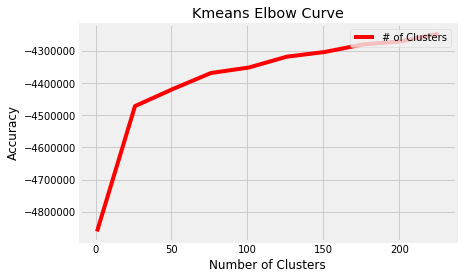

In [31]:


plt.plot(Nc, score, 'r-')

plt.legend(['# of Clusters','Accuracy'], loc = 'upper right')
plt.xlabel('Number of Clusters')
plt.ylabel('Accuracy')
plt.title('Kmeans Elbow Curve')

plt.show()

#fig.savefig('images/kmeanselbow.png')




### Setting Number of Clusters

In [33]:
start = time.time()

#not sure why I would have the random state. Ask Dr. Paul about that
#kmeans = KMeans(n_clusters=18).fit(modelb)
kmeans = KMeans(n_clusters=250, random_state=0).fit(model)

end = time.time()
print(end - start)

830.1739041805267


In [34]:
modelsize = len(model.columns)
modelsize

728

### Creating a Fake User with Fake Ratings

In [35]:
#creates a fake user with random ratings
userratings = np.random.randint(low = 0, high = 5, size=modelsize)
userratings = [userratings]
userratings

[array([1, 0, 0, 0, 2, 1, 0, 1, 0, 0, 4, 1, 0, 2, 1, 1, 2, 2, 2, 2, 2, 0,
        1, 1, 0, 0, 1, 2, 0, 3, 4, 4, 4, 2, 1, 4, 1, 0, 0, 1, 3, 3, 4, 2,
        1, 3, 2, 3, 4, 4, 4, 1, 2, 3, 4, 2, 4, 2, 3, 3, 2, 2, 3, 0, 3, 3,
        2, 2, 2, 3, 0, 2, 0, 3, 0, 4, 4, 0, 1, 2, 0, 0, 0, 3, 3, 4, 1, 2,
        1, 4, 3, 0, 3, 3, 1, 1, 2, 1, 3, 4, 0, 3, 3, 2, 0, 1, 1, 0, 2, 4,
        3, 4, 3, 0, 0, 3, 2, 0, 4, 2, 3, 0, 3, 2, 2, 2, 1, 0, 4, 0, 1, 1,
        1, 4, 1, 4, 1, 1, 2, 2, 4, 4, 2, 4, 2, 2, 0, 4, 2, 0, 1, 4, 1, 1,
        4, 4, 2, 1, 3, 2, 2, 4, 4, 1, 1, 3, 4, 3, 0, 1, 3, 4, 2, 0, 1, 1,
        0, 4, 1, 2, 2, 2, 2, 3, 0, 4, 1, 0, 2, 1, 2, 2, 3, 0, 0, 1, 4, 3,
        0, 0, 0, 2, 4, 3, 4, 4, 4, 4, 4, 3, 2, 1, 3, 2, 1, 2, 4, 2, 4, 1,
        3, 3, 4, 1, 4, 2, 0, 4, 0, 3, 1, 0, 2, 3, 3, 3, 0, 0, 2, 1, 2, 3,
        4, 4, 2, 3, 0, 2, 3, 0, 0, 0, 1, 1, 1, 2, 1, 1, 0, 2, 1, 4, 4, 1,
        0, 3, 1, 0, 4, 4, 3, 1, 3, 2, 2, 0, 0, 0, 1, 3, 1, 4, 3, 2, 2, 3,
        2, 4, 1, 3, 4, 1, 2, 4, 4, 4, 

In [36]:
#predict's what cluster our fake user is in
userscluster = kmeans.predict(userratings)
userscluster = userscluster[0]
userscluster

81

In [37]:
prediction = kmeans.cluster_centers_[userscluster]
prediction

array([2.79536941, 2.73902382, 2.67564036, 4.24444957, 2.96472351,
       3.89076426, 2.74951566, 3.27370762, 3.01163659, 2.34152109,
       2.9       , 2.63331816, 2.1       , 2.        , 2.5       ,
       1.4       , 2.68204131, 3.13113588, 3.32028169, 2.2       ,
       2.56255026, 3.07455068, 1.7       , 3.17945241, 3.7       ,
       2.89979953, 3.        , 2.91838565, 2.3       , 3.62911319,
       3.44077225, 3.        , 2.96192133, 2.7       , 1.5       ,
       2.37959427, 1.8       , 3.2997466 , 2.30888651, 1.8       ,
       3.4241574 , 3.5162022 , 2.52250735, 3.6       , 2.3       ,
       2.11208219, 2.90064152, 2.69290638, 2.08129524, 3.24445514,
       3.73178295, 2.7       , 1.99381919, 2.        , 1.5       ,
       3.31390892, 2.        , 2.5       , 1.7       , 1.7       ,
       2.52097485, 1.4487145 , 3.01506276, 2.56961587, 1.3       ,
       2.8       , 3.        , 1.6       , 2.3       , 2.6       ,
       2.1       , 1.6       , 2.39511098, 3.1       , 2.7    

In [38]:
sort_index = np.argsort(prediction)
top20 = sort_index[-21:-1]
top20

array([  5, 695, 286, 489, 146, 698, 211, 531, 150, 285,  90, 139, 416,
       126, 408, 181,   3, 581, 189, 414])

In [39]:
movietitles = model.columns
movietitles

Index(['10 Things I Hate About You (1999)', '101 Dalmatians (1996)',
       '101 Dalmatians (One Hundred and One Dalmatians) (1961)',
       '12 Angry Men (1957)', '13th Warrior, The (1999)',
       '2001: A Space Odyssey (1968)', '28 Days Later (2002)', '300 (2007)',
       '40-Year-Old Virgin, The (2005)', 'A.I. Artificial Intelligence (2001)',
       ...
       'Willy Wonka & the Chocolate Factory (1971)', 'Witness (1985)',
       'Wizard of Oz, The (1939)', 'World Is Not Enough, The (1999)',
       'X-Files: Fight the Future, The (1998)', 'X-Men (2000)',
       'X2: X-Men United (2003)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Zoolander (2001)'],
      dtype='object', name='titles', length=728)

### Fake User's Top 20 Recomendations

In [40]:
for i in top20:
    print(movietitles[i])

2001: A Space Odyssey (1968)
Usual Suspects, The (1995)
Godfather: Part II, The (1974)
Patton (1970)
Citizen Kane (1941)
Vertigo (1958)
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)
Rear Window (1954)
City of Lost Children, The (Cité des enfants perdus, La) (1995)
Godfather, The (1972)
Blade Runner (1982)
Chinatown (1974)
Manchurian Candidate, The (1962)
Casablanca (1942)
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)
Dark Knight, The (2008)
12 Angry Men (1957)
Shallow Grave (1994)
Delicatessen (1991)
Maltese Falcon, The (1941)


### Saving The Model Using Pickle

In [41]:
with open('flask-app/kmeans.pkl', 'wb') as fid:
    pickle.dump(kmeans, fid,2)  

In [42]:
"""#Save a dictionary of the index keys to make the dummy variables out of user input

#create a dataframe containing only the categorical variables. In our case, it is the entire dataset except the ARR_DELAY column
cat = model

index_dict = dict(zip(cat.columns,range(cat.shape[1])))

#Save the index_dict into disk
with open('flask-app/cat', 'wb') as fid:
    pickle.dump(index_dict, fid,2) """

"#Save a dictionary of the index keys to make the dummy variables out of user input\n\n#create a dataframe containing only the categorical variables. In our case, it is the entire dataset except the ARR_DELAY column\ncat = model\n\nindex_dict = dict(zip(cat.columns,range(cat.shape[1])))\n\n#Save the index_dict into disk\nwith open('flask-app/cat', 'wb') as fid:\n    pickle.dump(index_dict, fid,2) "

### Saving the Title & Average of Every Movie

In [43]:
"""

modelavgs = model
for column in modelavgs:
    modelavgs[column].fillna((modelavgs[column].mean()), inplace=True)
modelavgs.head(10)

"""

'\n\nmodelavgs = model\nfor column in modelavgs:\n    modelavgs[column].fillna((modelavgs[column].mean()), inplace=True)\nmodelavgs.head(10)\n\n'

In [44]:


movies = list(zip())

for column in model:
    #am I taking the average of an average? is this what is messing my model up?
    i = {'title':column, 'average':model[column].mean()}
    movies.append(dict(i))

In [45]:
movies[0:10]

[{'average': 3.476847034334319, 'title': '10 Things I Hate About You (1999)'},
 {'average': 3.0650397010704373, 'title': '101 Dalmatians (1996)'},
 {'average': 3.4391008886527996,
  'title': '101 Dalmatians (One Hundred and One Dalmatians) (1961)'},
 {'average': 4.222247847474306, 'title': '12 Angry Men (1957)'},
 {'average': 3.107872514296166, 'title': '13th Warrior, The (1999)'},
 {'average': 3.9538212792824132, 'title': '2001: A Space Odyssey (1968)'},
 {'average': 3.7475783015832214, 'title': '28 Days Later (2002)'},
 {'average': 3.6842690383512013, 'title': '300 (2007)'},
 {'average': 3.5581829496000235, 'title': '40-Year-Old Virgin, The (2005)'},
 {'average': 3.207605434969056,
  'title': 'A.I. Artificial Intelligence (2001)'}]

In [46]:
with open('flask-app/movies', 'wb') as fid:
    pickle.dump(movies, fid,2) 

In [47]:
len(movies)

728

In [48]:
with open('flask-app/movies','rb') as fid:
    movies2 = pickle.load(fid)

In [49]:
movies2[:15]

[{'average': 3.476847034334319, 'title': '10 Things I Hate About You (1999)'},
 {'average': 3.0650397010704373, 'title': '101 Dalmatians (1996)'},
 {'average': 3.4391008886527996,
  'title': '101 Dalmatians (One Hundred and One Dalmatians) (1961)'},
 {'average': 4.222247847474306, 'title': '12 Angry Men (1957)'},
 {'average': 3.107872514296166, 'title': '13th Warrior, The (1999)'},
 {'average': 3.9538212792824132, 'title': '2001: A Space Odyssey (1968)'},
 {'average': 3.7475783015832214, 'title': '28 Days Later (2002)'},
 {'average': 3.6842690383512013, 'title': '300 (2007)'},
 {'average': 3.5581829496000235, 'title': '40-Year-Old Virgin, The (2005)'},
 {'average': 3.207605434969056,
  'title': 'A.I. Artificial Intelligence (2001)'},
 {'average': 3.710102489016088, 'title': 'About a Boy (2002)'},
 {'average': 3.6665908056392413, 'title': 'Abyss, The (1989)'},
 {'average': 2.980925281907707, 'title': 'Ace Ventura: Pet Detective (1994)'},
 {'average': 2.6019169636815698,
  'title': 'Ace 

In [50]:
movies_dict = dict(zip())

for column in model:
    #i = {'title':column, 'average':model[column].mean()}
    movies_dict[column] = float(model[column].mean())
    


In [51]:
with open('flask-app/movies_dict','wb') as fid:
    pickle.dump(movies_dict, fid,2) 